In [ ]:
import numpy as np
import random
import math
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, color
import cv2

# im1=Image.open('mandm.png')
# lab1= color.rgb2lab(im1)
# im2 =Image.open('peppers.png')
# lab2 = color.rgb2lab(im2)


In [2]:
def get_centroids(im,k):
    """input : Takes an image im and value k for number of clusters
                to be made
       output : outputs randomly chosen k centroids in the image.
    """   
    centers=[]
    for i in range(k):
        centers.append(random.choice(random.choice(im)))
    return centers

def min_dist(pix,centroids):
    """ input : Takes a pixel value and the  k centroids as input
        output : returns the index of the centroid from which the minimum
                distance to the pixel was closest.
    """
    dist=[]
    for i in centroids:
        dist.append(np.sum(np.power((i-pix),2)))
    min_dist=np.argmin(dist)
    return min_dist

def find_clusters(im,centroids):
    """ Input : Takes the image and the k centroids as inputs
        output:  returns a dictionary in which keys are clusters numbers and values 
                are the pixels associated to that cluster.
    """
    keys=[]
    for x in range(len(centroids)):
        keys.append(x)
    clusters ={key:[] for key in keys} 

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            p = im[i,j]
            min_index = min_dist(p,centroids)
            clusters[min_index].append(p)
            
    return clusters

def new_cent(centroids,clusters):
    """input : takes the centroids and clusters as inputs
       output : finds the new centre by calcualting the mean of all pixels 
               in the associated cluster.
    """
    newcent=[]
    key=clusters.keys()
    for i in key:
        n_mean= np.mean(clusters[i],axis=0)
        newcent.append(n_mean)
    return newcent

0
1
2
3
4
5
6
7
8
9


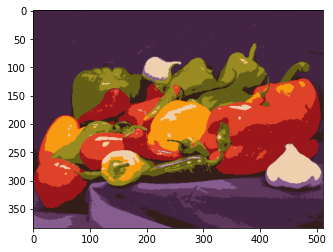

In [10]:
def k_means(im,k):
    """input : takes an image and the number of clusters needed
       output : an image segmented into the k clusters
    
    """
    ima=np.array(im)
    h=ima.shape[0]
    w=ima.shape[1]
    #centroids= get_centroids(ima,k)
    centroids= kpp(ima,k)

    old_centroids=[]
    for i in range(10):
        print(i)
        old_centroids = centroids 
        clusters = find_clusters(ima,centroids)
        centroids = new_cent(old_centroids,clusters)
    for x in range(h):
        for y in range(w):
            ima[x,y]=centroids[min_dist(ima[x,y],centroids)]
    plt.imshow(ima)
k_means(im2,10)

In [29]:
def make_lab5d(im):
    lab5d = np.zeros((im.shape[0],im.shape[1],5))
    height = lab5d.shape[0]
    width =lab5d.shape[1] 
    for x in range(height):
        for y in range(width):
            lab5d[x,y,0:3]=im[x,y,0:3]
            lab5d[x,y,3]=x
            lab5d[x,y,4]=y
    return lab5d
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


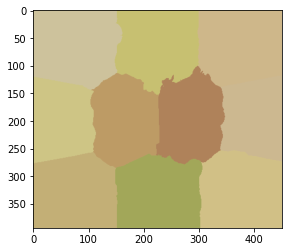

In [24]:
def k_means_for_5d(im,k):
    ima = make_lab5d(im)
    h=ima.shape[0]
    w=ima.shape[1]
    #centroids= get_centroids(ima,k)
    centroids = kpp(ima,k)
    old_centroids=[]
    for i in range(20):
        print(i)
        old_centroids = centroids 
        clusters = find_clusters(ima,centroids)
        centroids = new_cent(old_centroids,clusters)
    for x in range(h):
        for y in range(w):
            ima[x,y]=centroids[min_dist(ima[x,y],centroids)]
    plt.imshow(color.lab2rgb(ima[:,:,0:3]))
#     pic = Image.fromarray((color.lab2rgb(ima[:,:,0:3])*255).astype('uint8'))
#     pic.save(" mandm k =10 with c kmeans++(lab5d).png")
k_means_for_5d(lab1,10) 

In [9]:
def kpp(im1,K):
    cent=[]
    x=random.randrange(im1.shape[0])
    y=random.randrange(im1.shape[1])
    cent.append(im1[x,y])
    pixels =[]
    for i in range(im1.shape[0]):
        for j in range(im1.shape[1]):
            p =[]
            p.append(list(im1[i,j]))
            pixels.append(p)
    d=[]
    for k in range(1,K):
        dist=[]
        for x in range(im1.shape[0]):
            for y in range(im1.shape[1]):
                for c in cent:
                    d.append(np.sum((im1[x,y]-c)**2))
                dist.append(min(d))
                d=[]
        prob=dist/np.sum(dist)
        cum_prob=np.cumsum(prob)
        random_sample=random.random()
        for j,l in enumerate(cum_prob):
            if random_sample < l:
                i=pixels[j]
                break
        cent.append(i)
    return cent
            

In [30]:
k = make_lab5d(np.array(im1))
        
k

array([[[226., 207., 149.,   0.,   0.],
        [221., 202., 144.,   0.,   1.],
        [218., 199., 141.,   0.,   2.],
        ...,
        [234., 213., 168.,   0., 448.],
        [231., 216., 175.,   0., 449.],
        [220., 206., 177.,   0., 450.]],

       [[218., 199., 141.,   1.,   0.],
        [216., 197., 139.,   1.,   1.],
        [217., 198., 142.,   1.,   2.],
        ...,
        [234., 213., 168.,   1., 448.],
        [230., 215., 174.,   1., 449.],
        [220., 206., 177.,   1., 450.]],

       [[216., 197., 139.,   2.,   0.],
        [217., 198., 140.,   2.,   1.],
        [222., 203., 147.,   2.,   2.],
        ...,
        [236., 215., 170.,   2., 448.],
        [232., 217., 176.,   2., 449.],
        [222., 208., 179.,   2., 450.]],

       ...,

       [[206., 188., 138., 391.,   0.],
        [205., 187., 137., 391.,   1.],
        [205., 188., 136., 391.,   2.],
        ...,
        [220., 206., 177., 391., 448.],
        [219., 209., 182., 391., 449.],
        [

In [ ]:
img = cv2.imread('eyes.jpg', cv2.IMREAD_COLOR) 

